# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
print "\n", data.head()

Wholesale customers dataset has 440 samples with 6 features each.

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,3,2920,6252,440,223,709
2,12434,540,283,1092,3,2233


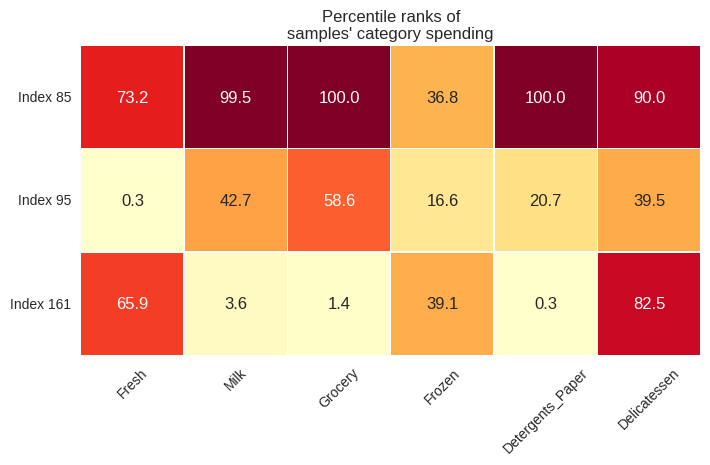

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#determine some indexes to find different customers
maxGroceryIndex = data[data['Grocery'] == np.max(data['Grocery'])].index
minFreshIndex = data[data['Fresh'] == np.min(data['Fresh'])].index
minDetergentsPaperIndex = data[data['Detergents_Paper'] == np.min(data['Detergents_Paper'])].index

# Select three indices of your choice you wish to sample from the dataset
indices = [maxGroceryIndex[0], minFreshIndex[0], minDetergentsPaperIndex[1]]

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "\nChosen samples of wholesale customers dataset:"
display(samples)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

Customer 0 purchases more than average on all categories, except Frozen. This could be a supermarket because it needs to supply all kind of products to its various customers. 

Customer 1 could be a gas station. Not so much of all products and you normally don't go there to buy fresh products.

Customer 2 could be a kind of restaurant because it purchases relatively a lot Fresh products and Delicatessen and less on categories like Milk and Detergents_Paper.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

ran_state = 21

def predictedScorePerFeature(df):
    col_scores = {}
    for column in data.columns:
        X = df.drop(column, axis=1)
        y = df[column]

        # Split the data into training and testing sets using the given feature as the target
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=ran_state)

        # Create a decision tree regressor and fit it to the training set
        regressor = DecisionTreeRegressor(random_state=ran_state)
        regressor.fit(X_train, y_train)

        # Report the score of the prediction using the testing set
        score = regressor.score(X_test, y_test)
        col_scores[column] = score 
    return col_scores

print predictedScorePerFeature(data)

{'Grocery': 0.73403293895690569, 'Frozen': -2.0504411310521236, 'Delicatessen': -0.93466387312757293, 'Detergents_Paper': 0.64722099411751621, 'Fresh': -1.4083012562012955, 'Milk': 0.55219524587824331}


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

I have decided to calculate the predicted score for all individual features. For some features like 'Fresh' and 'Delicatessen' the model fails to fit the data because the score is below 0.
The only feature that can be predicted with a reasonable score (> 0.7) is Grocery. So this is the only feature that could be dropped while still being able to identify customers' spending.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

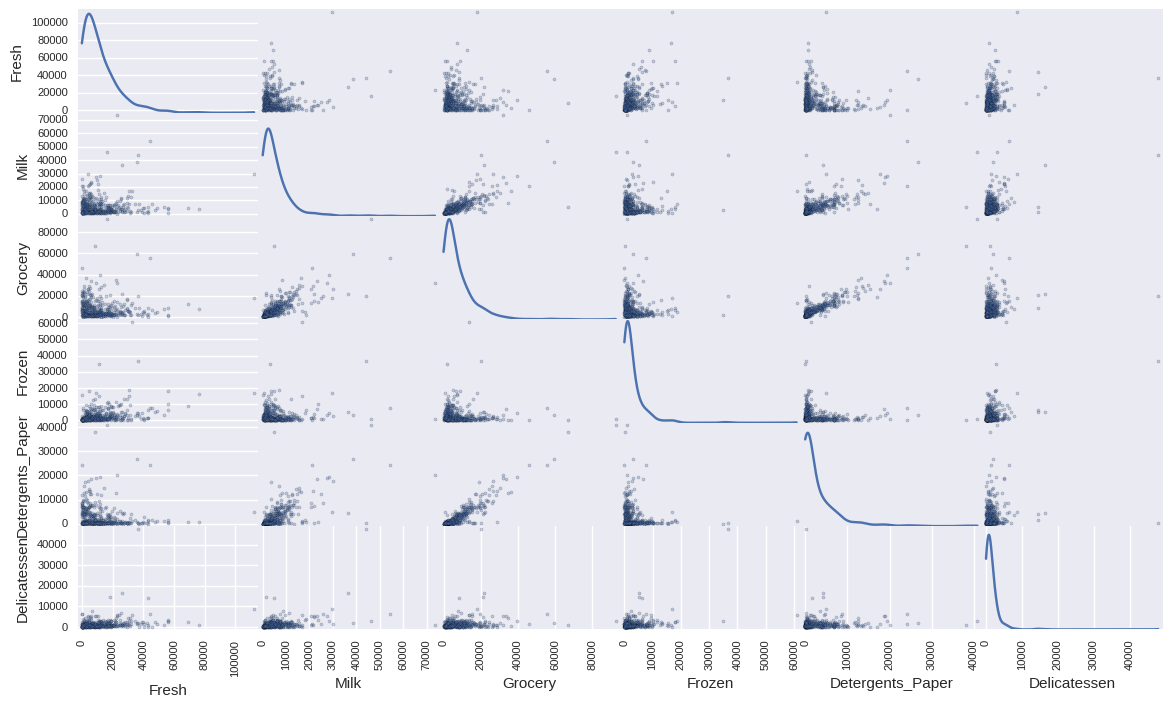

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

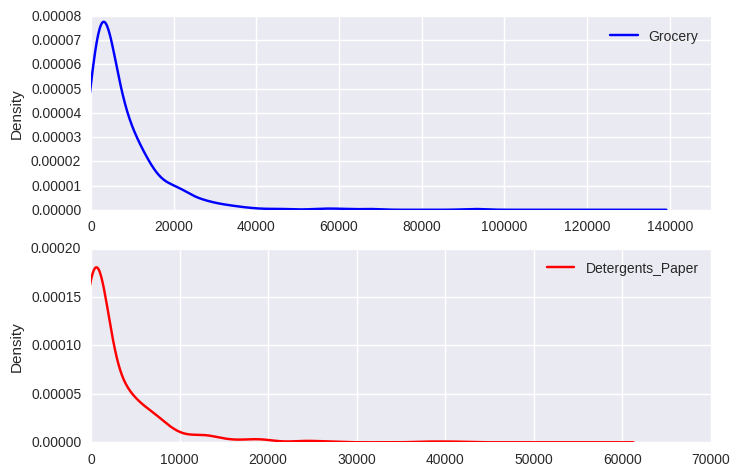

In [6]:
#Plot distributions of Grocery and Detergents_Paper
plt.figure(1)
plt.subplot(211)
data['Grocery'].plot(kind='density', color='b')
plt.xlim(xmin=0)
plt.legend()
plt.subplot(212)
data['Detergents_Paper'].plot(kind='density', color='r')
plt.xlim(xmin=0)
plt.legend()
plt.show()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

The features 'Grocery' and 'Detergents_Paper' seem to have the biggest correlation, because the points in this plot best fit a regression line. This confirms to the feature scores calculated in the last section because the prediction score for 'Grocery' was the highest. 

I have also plotted the density distributions of 'Grocery' and 'Detergents_Paper' individually to have a better look at the data distribution. For both features, the data is not normally distributed but right skewed. This means that there is a long tail on the right, so there is a small amount of customers that buy a large quantity, however most of them buy a small amount. That the distribution is right skewed can also be seen at the statistics calculated before: the mean is bigger than the median value.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

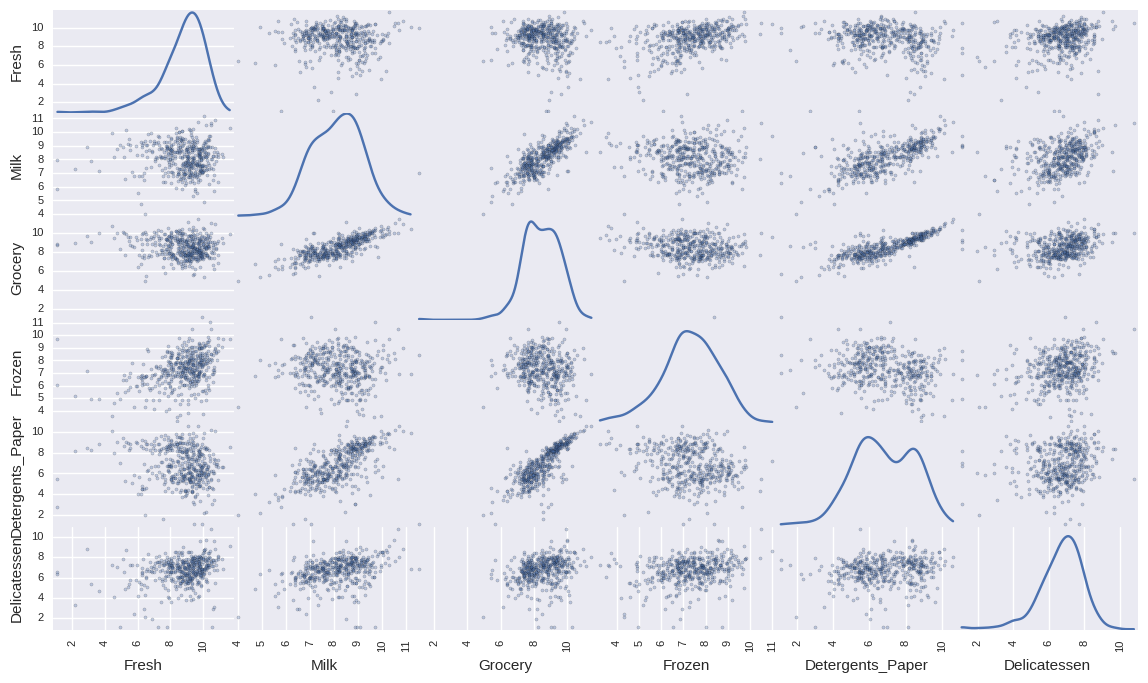

In [7]:
# Scale the data using the natural logarithm
log_data = np.log(data.copy())

# Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
2,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
from collections import defaultdict
from operator import itemgetter
outlierDict = defaultdict(int)
    
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], q=25)
    
    #Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], q=75)
    
    #Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Display the outliers
    print "Feature: '{}'".format(feature)
    print "Q1:{}, Q3:{}, step:{}, LB:{}, UB:{}".format(Q1, Q3, step, Q1-step, Q3+step)
    print "Data points considered outliers:"
    outlier_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlier_data)
    for i in outlier_data.index:
       outlierDict[i] += 1

# display the rows with multiple outliers
outlierDict = {k:v for k,v in outlierDict.iteritems() if v > 1}
outliersSorted = sorted(outlierDict.items(), key=itemgetter(1),reverse=True)
print "Customers with multiple outliers ({}) will be removed from the data".format(outliersSorted)

# Select the indices for data points you wish to remove
outliers  = outlierDict.keys()

# Check if outliers in samples
assert any(x in indices for x in outliers) == False, "Outliers should not be part of samples!"

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Feature: 'Fresh'
Q1:8.04805870221, Q3:9.73706394795, step:2.53350786861, LB:5.51455083361, UB:12.2705718166
Data points considered outliers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Feature: 'Milk'
Q1:7.33498124004, Q3:8.88048008859, step:2.31824827282, LB:5.01673296722, UB:11.1987283614
Data points considered outliers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Feature: 'Grocery'
Q1:7.67461620137, Q3:9.27385367724, step:2.3988562138, LB:5.27575998758, UB:11.672709891
Data points considered outliers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Feature: 'Frozen'
Q1:6.60967774917, Q3:8.17589608318, step:2.34932750101, LB:4.26035024816, UB:10.5252235842
Data points considered outliers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Feature: 'Detergents_Paper'
Q1:5.54810142479, Q3:8.27434059875, step:4.08935876094, LB:1.45874266385, UB:12.3636993597
Data points considered outliers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Feature: 'Delicatessen'
Q1:6.01187465693, Q3:7.50672842655, step:2.24228065442, LB:3.76959400251, UB:9.74900908097
Data points considered outliers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Customers with multiple outliers ([(154, 3), (128, 2), (65, 2), (75, 2), (66, 2)]) will be removed from the data


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

There are 5 customers that have an outlier for multiple categories. I have decided to remove those data points for 2 reasons. The customer must be pretty 'strange' if it has multiple outliers, so I think it is better to build a good model without these points. Next to this, the amount of 5 points in relation to the total amount of data points is not too big (5/440) so we don't lose too much data in building a model.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

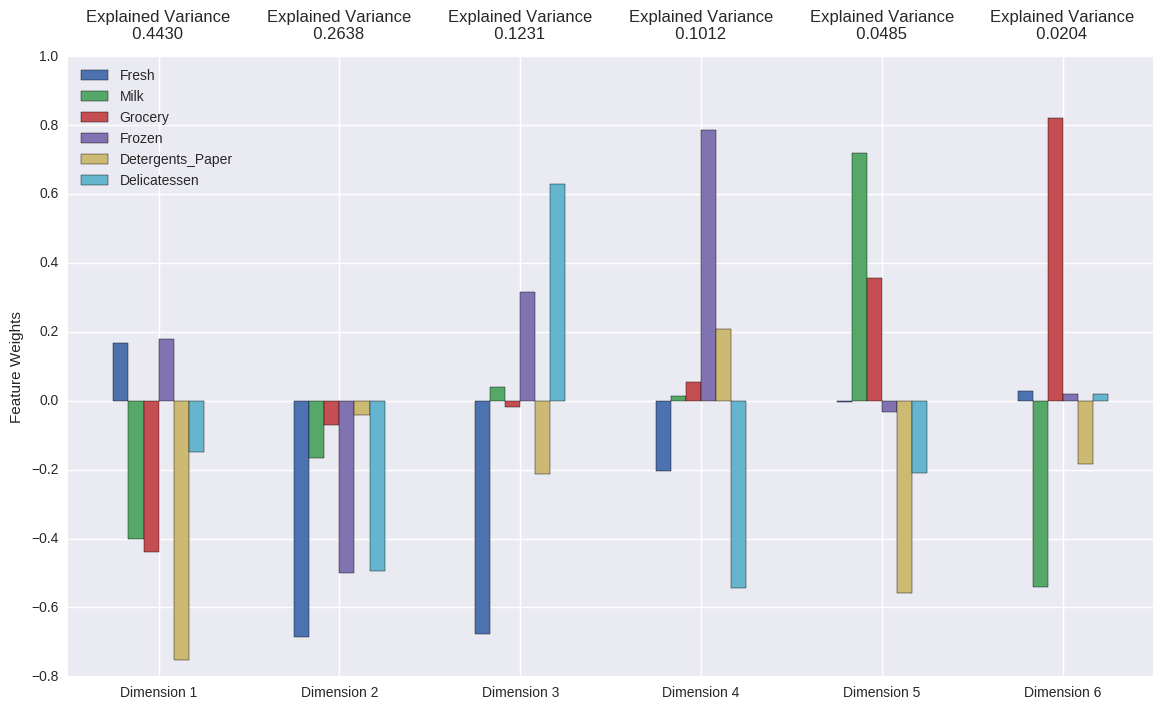

In [10]:
from sklearn.decomposition import PCA

ran_state = 21

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6, random_state = ran_state)
pca.fit(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

The first and second dimension explain about 70.7% of variance in the data. When the third and fourth dimension are added this increases to 93,1%.

The first dimension has a strong negative correlation with Detergents_Paper and a moderate negative correlation with Grocery and Milk. These are all items one can buy in a supermarket.

The second dimension has a strong negative correlation with Fresh and a moderate negative correlation with Frozen and Delicatessen. One could buy these items in smaller store where they sell ice, fruits and all kind of sweet products.

The third dimension has a strong negative correlation with Fresh and a quite strong positive correlation with Delicatessen. This dimension seems to be making a distinction between a delicatesse and ice shop and a shop with fresh fruits.

The fourth dimension has a strong positive correlation with Frozen and a moderate negative correlation with Delicatessen. This dimension therefore seems to be making a distinction between a delicatesse shop and an icecream shop.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,-0.5023,6.0080,5.0055,0.3870,0.8576,0.3129
2,6.1538,-0.0434,1.2753,-2.3200,0.6567,-0.2451


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2, random_state = ran_state)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data =  pca.transform(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,-0.5023,6.0080
2,6.1538,-0.0434


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

K-means is a simple hard-clustering algorithm. It is both simple to explain as well to execute. The main parameter for it is the number of clusters. Its implementation is also widely available in languages like python, R and Matlab.

Gaussian Mixture Model is a soft clustering algorithm since it uses probabilities to determine if a point belongs to a certain cluster. However, It is more complex since there are parameters to tune. It also takes more time to execute and is less scalable than K-means.

Since the dataset is not that big and GMM is more flexible, I will be using GMM. 

# Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

Number of clusers: 10, silhouette score :0.296390091088
Number of clusers: 9, silhouette score :0.306972754037
Number of clusers: 8, silhouette score :0.305574080189
Number of clusers: 7, silhouette score :0.323086770588
Number of clusers: 6, silhouette score :0.299192883437
Number of clusers: 5, silhouette score :0.303762583347
Number of clusers: 4, silhouette score :0.293269564847
Number of clusers: 3, silhouette score :0.37420184754
Number of clusers: 2, silhouette score :0.422324682646


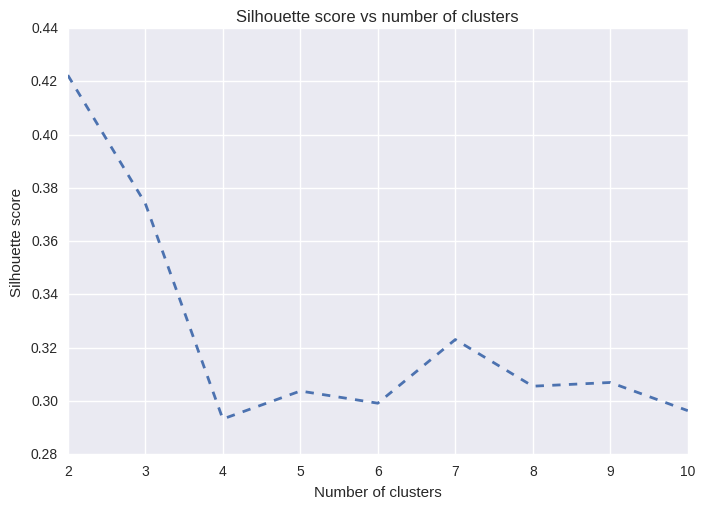

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score 
import matplotlib.pyplot as plt

scores = {}
# Looping with number of clusters as index. I am looping backwards, because the score is best for 2 clusters
# and I want to save some variables for that configuration!
for i in range(10, 1, -1):
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components = i, random_state = ran_state).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores[i] = score
    print "Number of clusers: {}, silhouette score :{}".format(i,score)

# plot scores
plt.plot(scores.keys(), scores.values(), '--', linewidth=2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs number of clusters')
plt.show()

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

I have plotted the silhouette score vs the number of clusters above. Clearly, the silhouette score is the best for 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

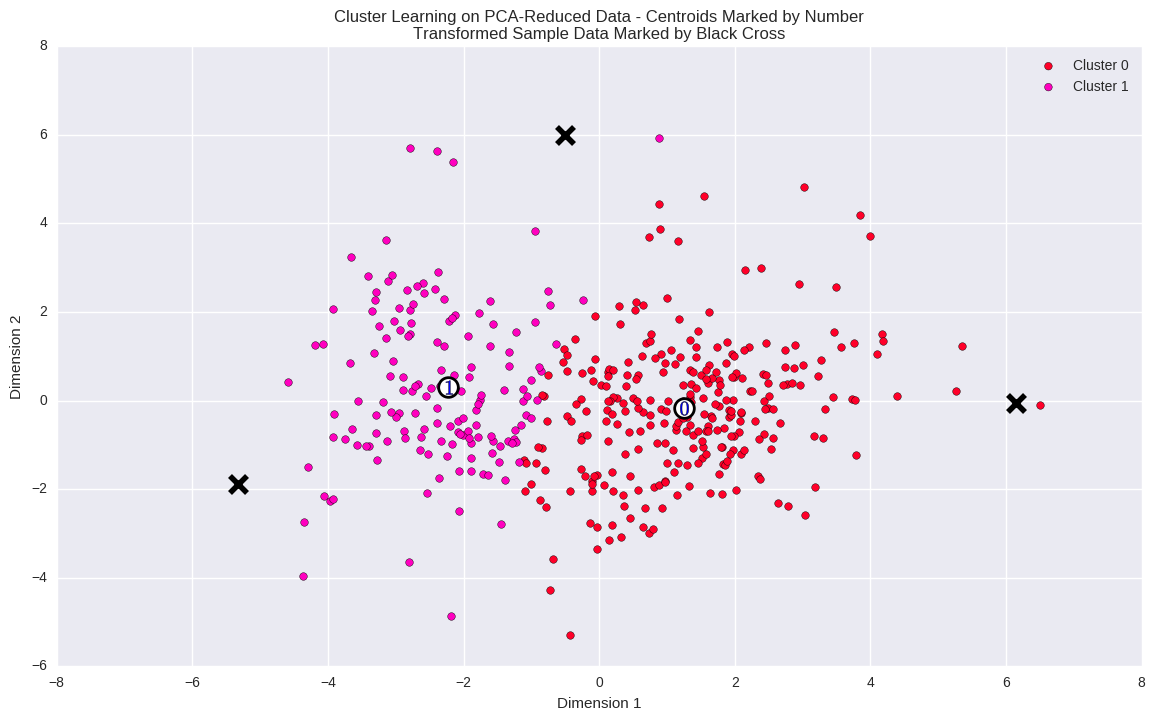

In [15]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [16]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers_df = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers_df.index = segments
display(true_centers_df)

# For each product and segment print the percentage to its mean
segmentCount = 0
for center in true_centers:
    print "\nSegment",segmentCount," percentage of each product category to its mean"
    productCount = 0
    percentages = []
    for amount in center:
        mean = np.mean(data[data.columns[productCount]]) 
        percentages.append(float("%.2f" % (amount / mean)))
        productCount += 1
    print percentages
    segmentCount += 1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0



Segment 0  percentage of each product category to its mean
[0.74, 0.36, 0.35, 0.67, 0.12, 0.48]

Segment 1  percentage of each product category to its mean
[0.3, 1.36, 1.54, 0.28, 1.64, 0.63]


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

The center of segment 0 has relatively a lot of Fresh and Frozen when comparing the amount to the mean of all product categories. I would say that this segment represents a restaurant or cafe where you can buy (fresh) meals, have an icecream and buy some Delicatessen.

Segment 1 has a center that represents relatively a lot of Milk, Groceries and Detergents_Paper, these are typically items one buys at a supermarket/food store. Therefore I think this segment represents food store customers.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [17]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


Sample point 0: my guess was this would be a supermarket. It is predicted to be in Cluster 1 which I have identified as food store clusters. Thus, the prediction is consistent.

Sample point 1: my guess was this would be a gas station. It is also predicted to be in Cluster 1. I think it is more appropriate to put it in Cluster 1 than in Cluster 0, since this customer purchases almost no Fresh food so I would say it isn't a restaurant. Therefore I would say the prediction is correct. 

Sample point 2: my guess was this would be a restaurant. It is also predicted to be in the restaurant Cluster (0), so this is also in line with my expectations.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

My expectation is that no customers will be happy with this change, at least if there is no compensation for this reduced delievery of service. 
However, the customers in the segments can have different reasons to react to the change.

Segment 0 buys relatively a lof of fresh products. When the delivery is reduced from 5 days to 3 days per week, it means that on average the products are less fresh. This will directly (negatively) influence the meals of their customers. So, because of this I expect these customers to react pretty negatively to the change.

Segment 0 are food stores and they order relatively not so much fresh products, so the argument of freshness is not so important here. A reason that they don't like the change can be that they are less flexible in their supply chain. When there is a sudden increased demand of product X, they might not be able to react to that fast enough and customers might go somewhere else. So, I would expect that these food stores are also not happy. However, I think the restaurants in segment 0 will react more negatively because the freshness argument could affect a larger part of their customers.

When executing an A/B test in this situation we have to take into account the clusters. Because we have identified these clusters and know these represent different type of customers that could react different to the change. I suggest to select a random sample from each cluster and change the delivery service for these customers. After a certain time period (a month for example), ask for their satisfaction-score. A control group that is selected from the remaining customers should still keep the same delivery as before. They also should be asked for their satisfaction-score afterwards. In this way a comparison can be made and one can tell if the difference is significant.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

In a supervised algorithm the labels are known, so the engineered feature 'customer_segment' can be used as the label in this kind of algorithm. The other product features can be trained to predict the customer segment on the original customers.  This will deliver a supervised classification model (e.g. a Logistic Regression model). This model can be used to predict the customer segment for the 10 new customers.  


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

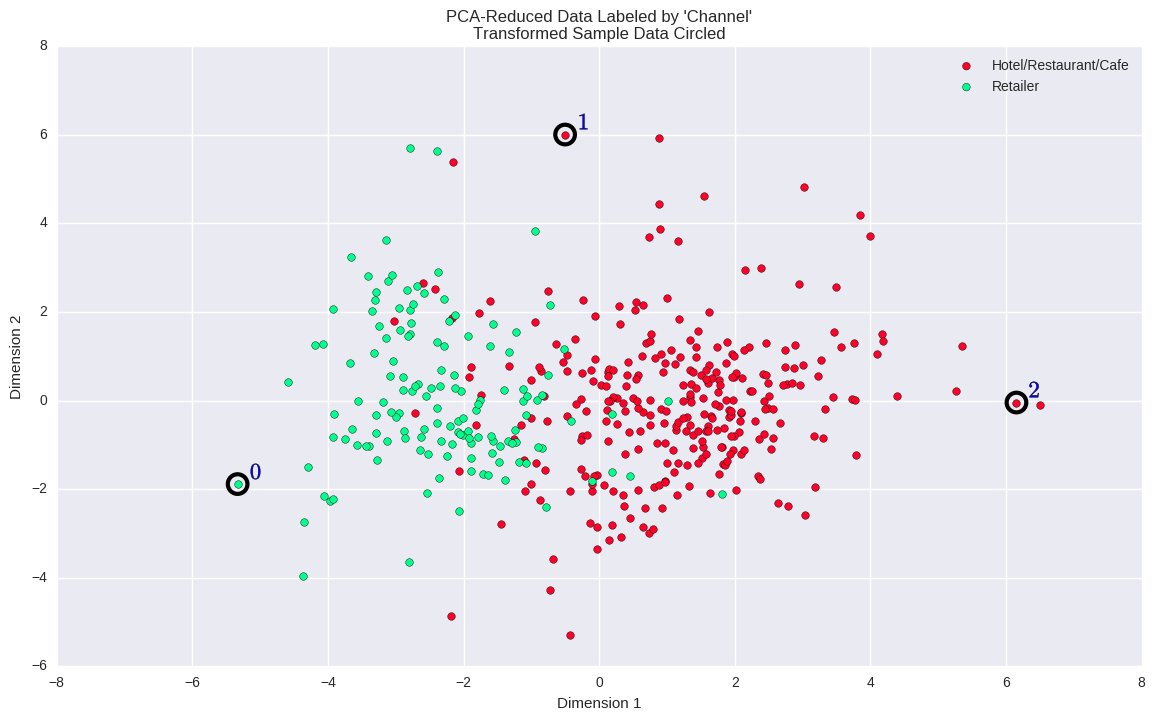

In [18]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

The underlying distribution of Hotel/Restaurant/Cafe customers and Retail customers seems to fit quite well my 2 customer segments. Because this visualization looks quite similar to the earlier cluster visualization. So, the shilouette score seems to have found the underlying distribution.

There is considerable overlap in the cluster distribution, i.e. there are green points close to the red center and vice versa. So, for some customers you can classify them as pure Retailers or 'Hotels/Restaurants/Cafes' but for the most customers it is more ambiguous.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.